In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
from urllib import request as rq
import urllib
import re
import math
import os
import csv
import time
import json
import pickle
import sys
import requests
from scipy import stats
from math import log

from sklearn.cross_decomposition import PLSRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
cwd = os.getcwd()
print(cwd)

/home/liam/Repositories/oscars/models


In [2]:
# use AA_bestpictures_Liam_Kimiko_clean.csv
datacsv = open("../AA_bestpictures_Liam_Kimiko_clean.csv")
reader = list(csv.reader(datacsv, delimiter=',', quotechar='"'))

# print(list(reader))
fields = [x.strip() for x in reader.pop(0)]

frame = pd.DataFrame(reader, columns=fields)
print(fields)
X = [[float(x[5].strip()),int(x[6].strip()),int(x[7].strip()),float(x[8].strip()),int(x[9].strip()),float(x[10].strip())] for x in reader]
Y = []
for x in reader:
    ret = 0
    if x[2].strip() == "True":
        ret = 1
    Y.append(ret)
# for row in reader:
#     print (row)

XTest = X[-100:]
YTest = Y[-100:]
XTrain = X[:-100]
YTrain = Y[:-100]
logreg = linear_model.LogisticRegression()
logreg.fit(XTrain, YTrain)

# pls = PLSRegression(n_components=3, max_iter=30000)
# pls.fit(inputs,outputs)
# pred = pls.predict(inputs)
# pls.score(inputs,outputs)
# # pls.get_params()

['year', 'Academy Award', 'Winner', 'Movie Name', 'Producer', 'IMDB Rating', 'IMDB Votes', 'Tomatometer', 'Average Critic Score', 'Percent Audience Liked', 'Average Audience Score']


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [3]:
# print(StatsOnly)
stats.describe(X)

DescribeResult(nobs=512, minmax=(array([  3.1,   5. ,  11. ,   3.6,  17. ,   5.4]), array([  1.00000000e+01,   1.72328000e+06,   1.00000000e+02,
         9.50000000e+00,   9.80000000e+01,   9.00000000e+00])), mean=array([  7.55722656e+00,   1.11748066e+05,   8.71875000e+01,
         7.70117187e+00,   8.06777344e+01,   7.51835937e+00]), variance=array([  5.12041608e-01,   4.56815351e+10,   1.82990215e+02,
         8.44890992e-01,   1.75424317e+02,   3.81971471e-01]), skewness=array([-1.67949751,  3.09008297, -2.17639506, -0.83171907, -1.85023786,
       -0.53055206]), kurtosis=array([  7.69090486,  11.80190217,   6.27310705,   1.10075016,
         4.22542336,   0.25257676]))

In [4]:
score = logreg.score(XTest, YTest)
print("Our regression has an accuracy of %s%%" % (score*100))


preds =  logreg.predict(XTest)
corr = 0
for o,e in zip(preds,YTest):
    if o == e and o == 1:
        corr += 1
winners = [y for y in YTest if y == 1]
losers = [y for y in YTest if y == 0]
print(len(winners))
print(len(losers))
print("We predict winners with an accuracy of %s%%" % ((corr/len(winners))*100))

Our regression has an accuracy of 81.0%
15
85
We predict winners with an accuracy of 6.666666666666667%


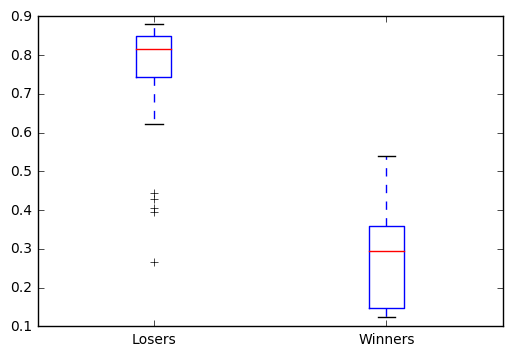

Clearly our regression is better at predicting losers
Ttest_indResult(statistic=15.040930883530796, pvalue=3.3098337033431009e-27)
Perhaps this is simply because losers occur more frequently and we dont have enough data to counter act this trend


In [5]:
# gets the prediction strength for each row in Test set
# sorts predictions by class and box plots them
strengths = logreg.predict_proba(XTest)
strengthsSorted = [[],[]]
for strenM, out in zip (strengths,YTest):
    strengthsSorted[out].append(strenM[out])
# print(strengthsSorted)
plt.boxplot(strengthsSorted, labels=["Losers", "Winners"])
plt.show()
ttestres = stats.ttest_ind(strengthsSorted[0], strengthsSorted[1])
print("Clearly our regression is better at predicting losers")
print(ttestres)
print("Perhaps this is simply because losers occur more frequently and we dont have enough data to counter act this trend")

In [6]:
# these are the weights for the models inputs
for l,v in zip(fields[5:], logreg.coef_[0]):
    print(l+ ": " + str(v))
print(logreg.intercept_)

IMDB Rating: -0.000956738984608
IMDB Votes: 2.35836775855e-06
Tomatometer: -0.0110434724646
Average Critic Score: -0.000932249067639
Percent Audience Liked: -0.00975224139409
Average Audience Score: -0.000951346002073
[-0.00013117]


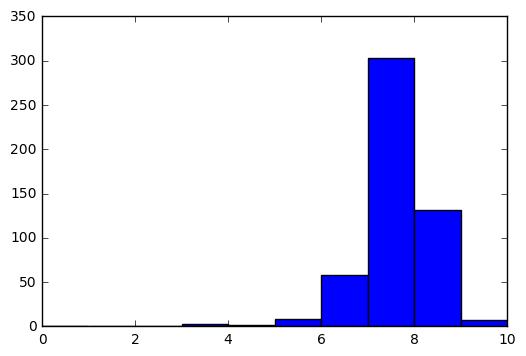

IMDB Rating
Observations: 512
Min: 3.1
Max: 10.0
Mean: 7.5572265625
Median: 7.6
Standard Dev: 0.714871685545






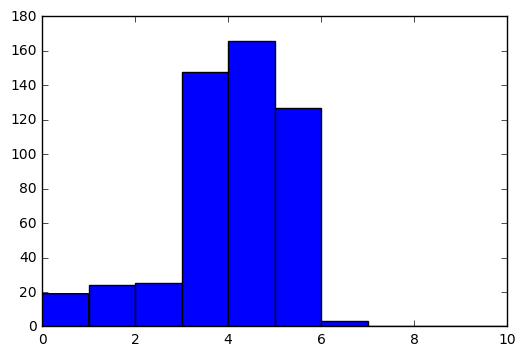

Log10 of IMDB Votes
Observations: 512
Min: 0.698970004336
Max: 6.23635584772
Mean: 4.13163840718
Median: 4.20774161131
Standard Dev: 1.2049279887






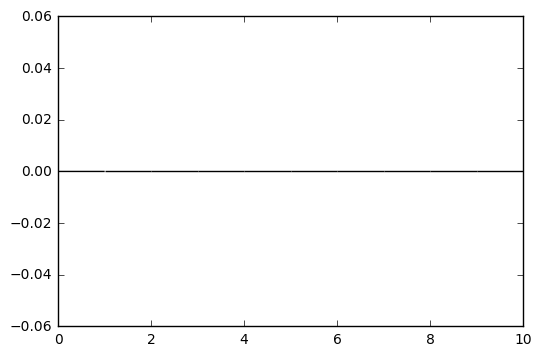

Tomatometer
Observations: 512
Min: 11
Max: 100
Mean: 87.1875
Median: 91.0
Standard Dev: 13.5141708033






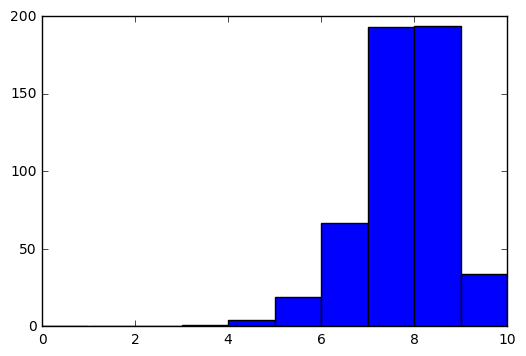

Average Critic Score
Observations: 512
Min: 3.6
Max: 9.5
Mean: 7.701171875
Median: 7.8
Standard Dev: 0.918281446077






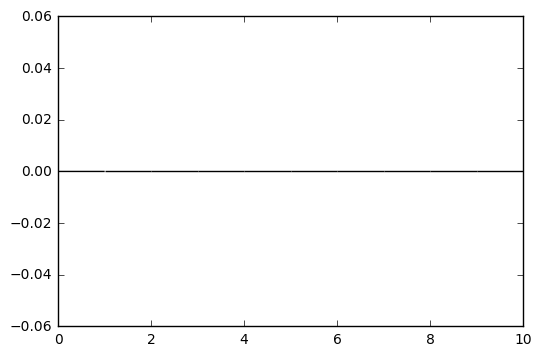

Percent Audience Liked
Observations: 512
Min: 17
Max: 98
Mean: 80.677734375
Median: 84.0
Standard Dev: 13.2318438527






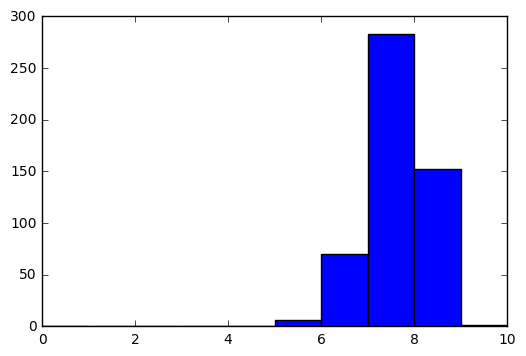

Average Audience Score
Observations: 512
Min: 5.4
Max: 9.0
Mean: 7.518359375
Median: 7.6
Standard Dev: 0.617434557949






In [7]:
inputArrs = [[] for i in range(len(X[0]))]
for i in range(len(X[0])):
    inputArrs[i] = [x[i] for x in X]
# print(inputArrs)
for i,x in enumerate(inputArrs[1]):
    if x > 0:
        inputArrs[1][i] = log(x,10)
# inputArrs[1] = [log(x,10) for x in inputArrs[1]]

for i,arr in enumerate(inputArrs):
    
    plt.hist(arr, label=fields[i+5], range=(0, 10))
    plt.show()
    if i != 1:
        print(fields[i+5])
    else:
        print("Log10 of %s" % fields[i+5].strip())
    desc = stats.describe(arr)
    print("Observations: %s" % desc.nobs)
    print("Min: %s" % desc.minmax[0])
    print("Max: %s" % desc.minmax[1])
    print("Mean: %s" % desc.mean)
    print("Median: %s" % np.median(arr))
    print("Standard Dev: %s" % np.std(arr))
    print("\n")
    print("\n")